<div align='center'>
    <a href="https://ibb.co/yy3hbxC"><img src="https://i.ibb.co/WyTDYRX/how-to-negotiate-a-salary-increase-13.png" alt="how-to-negotiate-a-salary-increase-13" border="0"></a>
</div>

# Project Content <a id=0></a>
* 1. [First Organization](#1)
        * 1.1 [Load Libraries](#1.1)
        * 1.2 [Load Dataset](#1.2)
* 2. [Exploring Dataset](#2)
        * 2.1 [Getting To Know The Variables](#2.1)
        * 2.2 [Missing Values](#2.2)
        * 2.3 [Unique Values](#2.3)
* 3. [Data Cleaning](#3)
        * 3.1 [Resolve Education Level Inconsistencies](#3.1)
        * 3.2 [Correcting Numeric Variables Data Type](#3.2)
* 4. [Exploratory Data Analysis](#4)
        * 4.1 [Gender's Count](#4.1)
        * 4.2 [Education Level's Count](#4.2)
        * 4.3 [Job Title's Count](#4.3)
        * 4.4[ Salary Distibution ](#4.4)
        * 4.5 [Age Distibution ](#4.5)
        * 4.6 [Years Of Experience Distibution](#4.6)
        * 4.7 [Regplot : Salary Vs Age](#4.7)
        * 4.8 [Regplot : Salary Vs Years Of Experience](#4.8)
        * 4.9 [Mean Salary By Education Level](#4.9)
        * 4.10 [Relationship Between Salary, Age and Education Level](#4.10)
        * 4.11 [Relationship between Years of Experience and Salary by Gender](#4.11)
        * 4.12 [4.12 Relationship between Years of Experience and Salary by Education Level](#4.12)
        * 4.13 [Pairplot](#4.13)
        * 4.14 [Boxplot: Salary Based On Age & Gender](#4.14)
        * 4.15 [Age, Salary and Years Of Experience Comparison By Gender](#4.15)
        * 4.16 [Correlation](4.16)

# 1. First Organization <a id=1></a>

## 1.1 Import Libraries <a id=1.1></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1.2 Import Dataset <a id=1.2></a>

In [7]:
df = pd.read_csv("Salary_Data.csv")

# 2. Exploring Dataset

## 2.1 Getting To Know The Variables <a id=2.1></a>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


| Variable            | Description                          | Dtype   | Non-Null Count |
|---------------------|--------------------------------------|---------|----------------|
| Age                 | Age of the individuals               | float64 | 6702           |
| Gender              | Gender of the individuals            | object  | 6702           |
| Education Level     | Education level of the individuals   | object  | 6701           |
| Job Title           | Job titles of the individuals        | object  | 6702           |
| Years of Experience| Years of experience of the individuals| float64 | 6701           |
| Salary              | Salary of the individuals            | float64 | 6699           |


## 2.2 First Assessment <a id=2.2></a>

In [9]:
df.head(2)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0


In [10]:
df.shape

(6704, 6)

In [11]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [12]:
df.duplicated().sum()

4912

## 2.2 Missing Values <a id=2.2></a>

In [14]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [15]:
df.dropna(inplace=True)
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


## 2.3 Unique Values <a id=2.3></a>

In [17]:
pd.DataFrame(df.nunique(), columns=['Unique Values'])

,Unique Values
Age,41
Gender,3
Education Level,7
Job Title,191
Years of Experience,37
Salary,444


In [20]:
pd.DataFrame(df['Gender'].value_counts())

,count
Gender,
Male,3671
Female,3013
Other,14


In [21]:
pd.DataFrame(df['Education Level'].value_counts())

,count
Education Level,
Bachelor's Degree,2265
Master's Degree,1572
PhD,1368
Bachelor's,756
High School,448
Master's,288
phD,1


In [22]:
pd.DataFrame(df['Job Title'].value_counts())

,count
Job Title,
Software Engineer,518
Data Scientist,453
Software Engineer Manager,376
Data Analyst,363
Senior Project Engineer,318
...,...
Account Manager,1
Help Desk Analyst,1
Senior Training Specialist,1


In [23]:
pd.DataFrame(df['Years of Experience'].value_counts())

,count
Years of Experience,
2.0,610
3.0,602
1.0,540
4.0,522
6.0,438
8.0,425
5.0,399
9.0,380
7.0,352


# 3. Data Cleaning
[Go To Project Content](#0)


## 3.1 Resolve Education Level Inconsistencies <a id=3.1></a>

In [24]:
# Resolve Education Level Inconsistency
df['Education Level'].value_counts().to_frame()

,count
Education Level,
Bachelor's Degree,2265
Master's Degree,1572
PhD,1368
Bachelor's,756
High School,448
Master's,288
phD,1


In [25]:
def solve_education_level(s):
  for i in ['Bachelor', 'Master', 'PhD']:
    if i.lower() in s.lower() :
      return i
  return s

df['Education Level'] = df['Education Level'].apply(solve_education_level)

# Let's check .value_counts again to be sure about method's functionality
df['Education Level'].value_counts().to_frame()

,count
Education Level,
Bachelor,3021
Master,1860
PhD,1369
High School,448


## 3.2 Correcting Numeric Variables Data Type <a id=3.2></a>

In [31]:
df['Age'] = df['Age'].astype('int')
df['Years of Experience'] = df['Years of Experience'].astype('int')
df['Salary'] = df['Salary'].astype('int')

In [34]:
df.dtypes

Age                     int32
Gender                 object
Education Level        object
Job Title              object
Years of Experience     int32
Salary                  int32
dtype: object

# 4. Exploratory Data Analysis <a id=4></a>
[Go To Project Content](#0)


## 4.1 Gender's Count <a id=4.1></a>

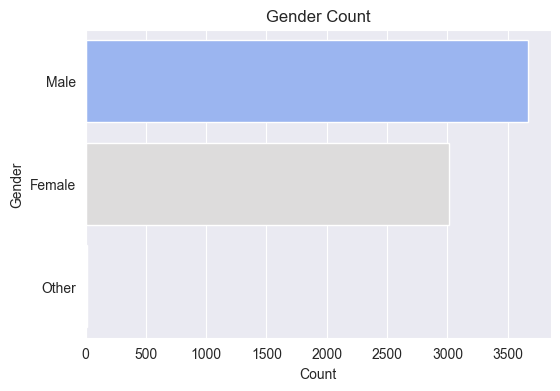

In [48]:
plt.figure(figsize=(6, 4))
sns.set_style('darkgrid')
sns.countplot(data=df, y='Gender', palette='coolwarm', orient='h')
plt.title("Gender Count")
plt.xlabel("Count")
plt.ylabel("Gender")
plt.show()

## 4.2 Education Level's Count <a id=4.2></a>

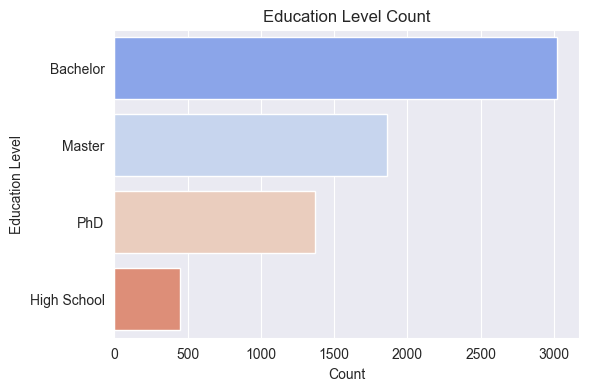

In [51]:
plt.figure(figsize=(6, 4))
sns.set_style('darkgrid')
sns.countplot(data=df, y='Education Level', palette='coolwarm', orient='h')
plt.title("Education Level Count")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.show()

## 4.3 Job Title's Count <a id=4.3></a>

In [59]:
top_jobs = df['Job Title'].value_counts().to_frame().reset_index().head(10)
top_jobs

,Job Title,count
0,Software Engineer,518
1,Data Scientist,453
2,Software Engineer Manager,376
3,Data Analyst,363
4,Senior Project Engineer,318
5,Product Manager,313
6,Full Stack Engineer,308
7,Marketing Manager,255
8,Back end Developer,244
9,Senior Software Engineer,244


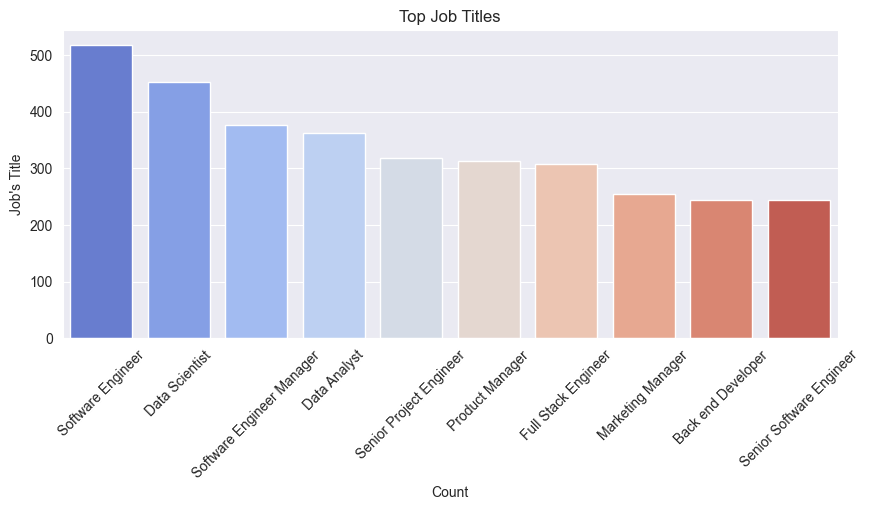

In [67]:
plt.figure(figsize=(10, 4))
sns.set_style('darkgrid')
sns.barplot(data=top_jobs, x='Job Title', y='count', palette='coolwarm')
plt.title("Top Job Titles")
plt.xlabel("Count")
plt.ylabel("Job's Title")
plt.xticks(rotation=45)
plt.show()

## 4.4 Salary Distibution <a id=4.4></a>

In [70]:
def kdeplot(df, col):
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df[col], color='blue', fill=True)
    plt.xlabel(f"{col}", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.title(f"KDE Plot for {col}", fontsize=14)
    plt.show()

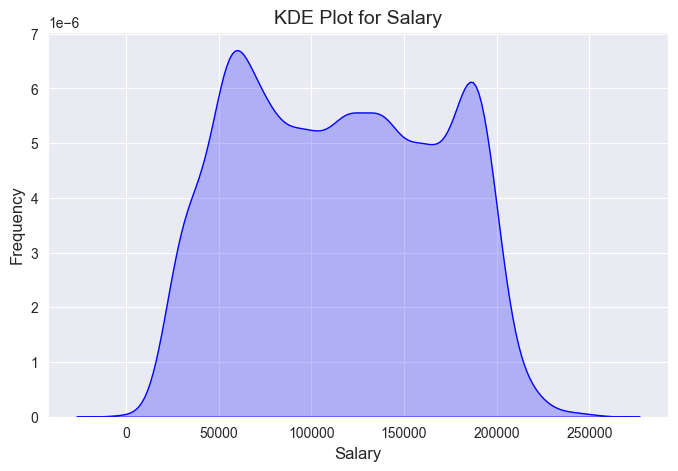

In [72]:
kdeplot(df, 'Salary')

## 4.5 Age Distibution <a id=4.5></a>

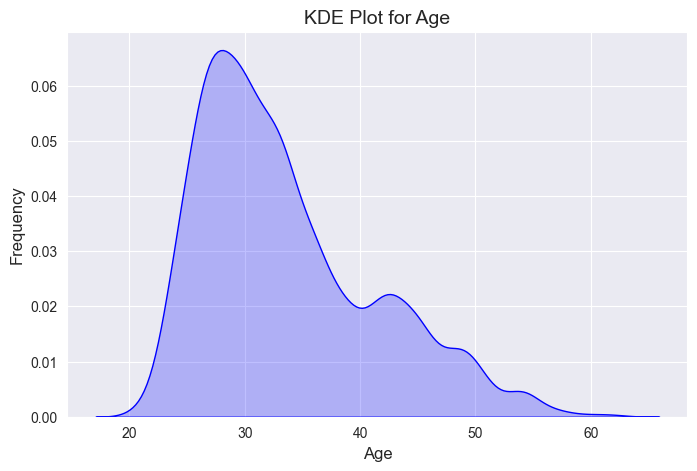

In [73]:
kdeplot(df, 'Age')

## 4.6 Years Of Experience Distibution 

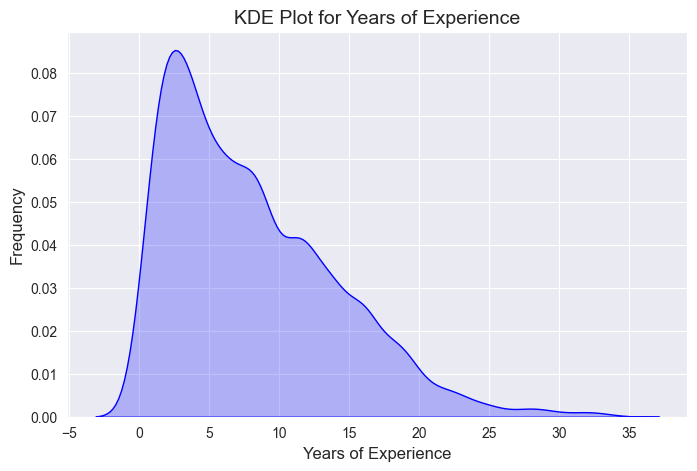

In [75]:
kdeplot(df, 'Years of Experience')

## 4.7 Regplot : Salary Vs Age <a id=4.7></a>

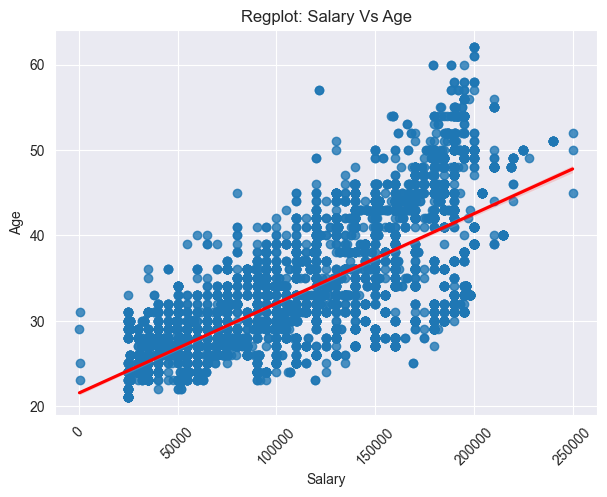

In [82]:
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.regplot(data=df, x='Salary', y='Age', line_kws={'color': 'red'})
plt.title("Regplot: Salary Vs Age")
plt.xlabel("Salary")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()

## 4.8 Regplot : Salary Vs Years Of Experience <a id=4.8></a>

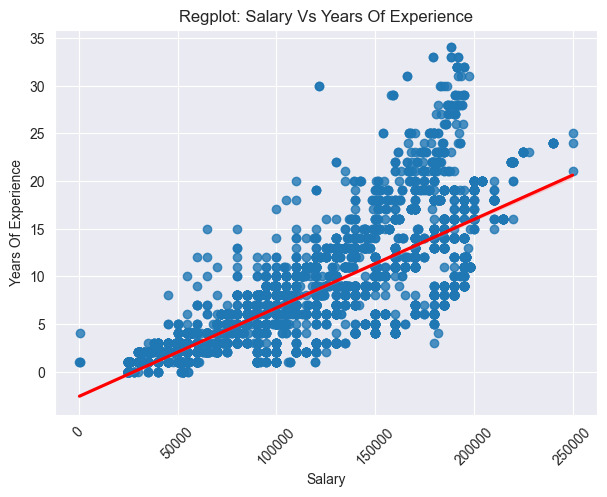

In [84]:
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.regplot(data=df, x='Salary', y='Years of Experience', line_kws={'color': 'red'})
plt.title("Regplot: Salary Vs Years Of Experience")
plt.xlabel("Salary")
plt.ylabel("Years Of Experience")
plt.xticks(rotation=45)
plt.show()

## 4.9 Mean Salary By Education Level <a id=4.9></a>

In [91]:
mean_salary_by_education = df.groupby('Education Level')['Salary'].mean().to_frame().reset_index()
mean_salary_by_education

,Education Level,Salary
0,Bachelor,95082.908640
1,High School,36706.694196
2,Master,130112.056452
3,PhD,165651.457999


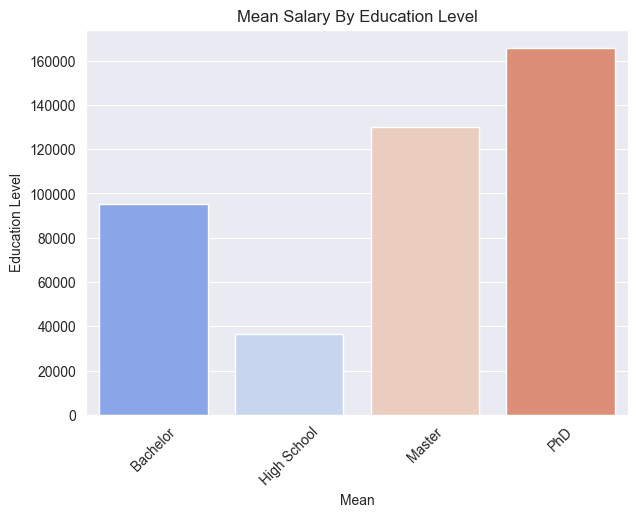

In [94]:
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.barplot(data=mean_salary_by_education, x='Education Level', y='Salary', palette='coolwarm')
plt.title("Mean Salary By Education Level")
plt.xlabel("Mean")
plt.ylabel("Education Level")
plt.xticks(rotation=45)
plt.show()

## 4.10 Relationship Between Salary, Age and Education Level <a id=4.10)></a>

,Education Level,Salary,Age,Years of Experience
0,Bachelor,95082.908640,30.260179,5.418073
1,High School,36706.694196,26.854911,1.915179
2,Master,130112.056452,35.171505,9.644624
3,PhD,165651.457999,41.154858,13.915267


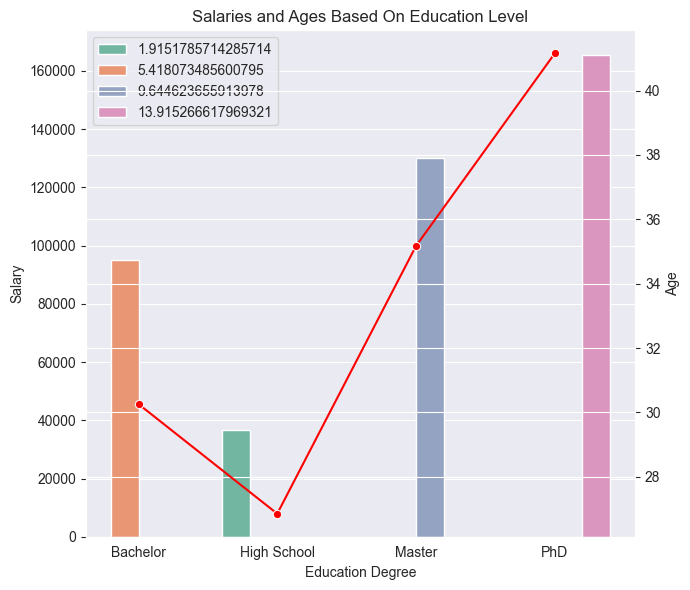

In [107]:
d2 = df.groupby("Education Level").agg({'Salary': 'mean', 'Age': 'mean', 'Years of Experience': 'mean'}).reset_index()

# Display the result
display(d2)

# Plotting
plt.figure(figsize=(7, 6))
ax = sns.barplot(y='Salary', x='Education Level', hue='Years of Experience', data=d2, palette='Set2')

# Add a secondary y-axis for the line plot
ax2 = ax.twinx()
sns.lineplot(x='Education Level', y='Age', data=d2, color='red', ax=ax2, marker='o')

# Set labels and title
ax.set_xlabel("Education Degree")
ax.set_ylabel("Salary")
ax2.set_ylabel("Age")
plt.title("Salaries and Ages Based On Education Level")

# Show legend for both plots
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

## 4.11 Relationship between Years of Experience and Salary by Gender <a id=4.11></a>

<Figure size 800x600 with 0 Axes>

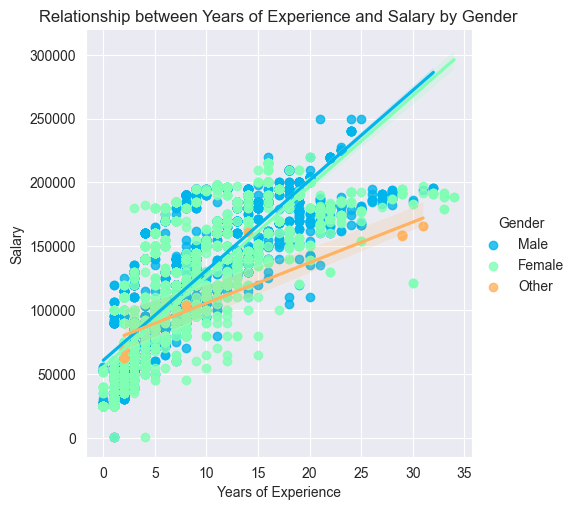

In [113]:
plt.figure(figsize=(8, 6))
sns.lmplot(data=df, x='Years of Experience', y='Salary', hue='Gender', palette='rainbow')
plt.title("Relationship between Years of Experience and Salary by Gender", fontsize=12)
plt.xlabel("Years of Experience", fontsize=10)
plt.ylabel("Salary", fontsize=10)
plt.show()

## 4.12 Relationship between Years of Experience and Salary by Education Level <a id=4.12></a>

<Figure size 800x600 with 0 Axes>

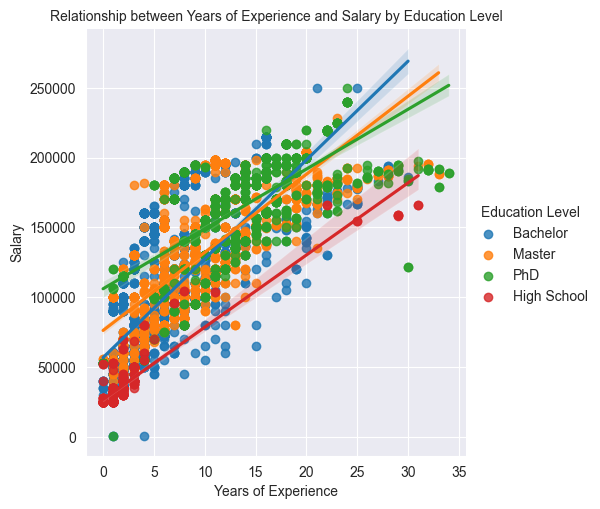

In [116]:
plt.figure(figsize=(8, 6))
sns.lmplot(data=df, x='Years of Experience', y='Salary', hue='Education Level')
plt.title("Relationship between Years of Experience and Salary by Education Level", fontsize=10)
plt.xlabel("Years of Experience", fontsize=10)
plt.ylabel("Salary", fontsize=10)
plt.show()

## 4.13 Pairplot <a id=4.13></a>

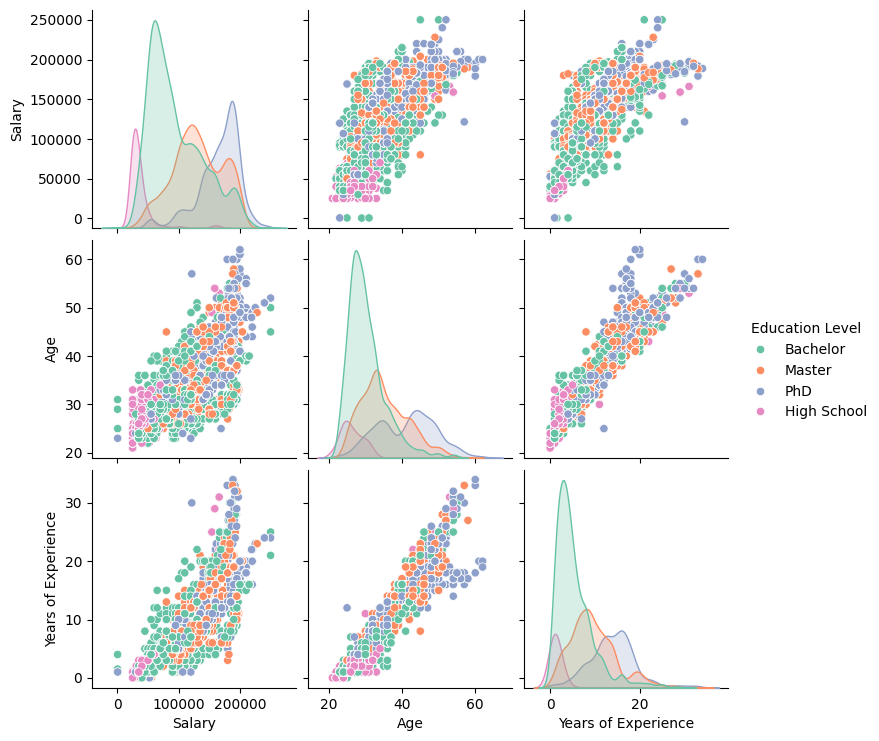

In [118]:
# Create a pairplot
sns.pairplot(df[['Salary', 'Age', 'Years of Experience', 'Education Level']], hue='Education Level', palette='Set2')
plt.show()

## 4.14 Boxplot: Salary Based On Age & Gender <a id=4.14></a>

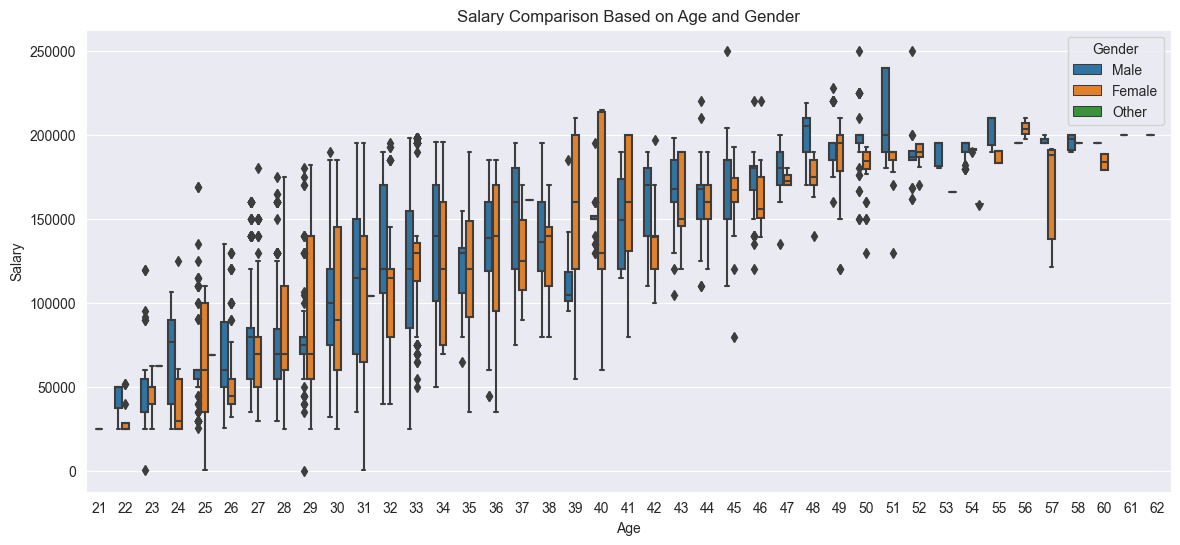

In [119]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Age', y='Salary', hue='Gender', data=df)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Salary Comparison Based on Age and Gender")
plt.legend(title='Gender')
plt.show()

## 4.15 Age, Salary and Years Of Experience Comparison By Gender <a id=4.15></a>

In [118]:
df.groupby('Gender')[['Age', 'Salary', 'Years of Experience']].agg('mean')

,Age,Salary,Years of Experience
Gender,,,
Female,32.626286,107888.998672,7.418852
Male,34.418415,121395.697630,8.616726
Other,39.571429,125869.857143,16.428571


1- Age:

* 'Other' gender category has the highest average age (39.57 years), followed by 'Male' (34.42 years) and 'Female' (32.63 years).

2- Sample Size:

* 'Male' category has the largest sample size (3671), while 'Other' has the smallest (14).
'
3- Salary:

* 'Other' category shows slightly higher average salary ($125,870) compared to 'Female' ($107,889) and 'Male' ($121,396).

4- Experience:

* 'Other' category has the highest average years of experience (16.43 years), followed by 'Male' (8.62 years) and 'Female' (7.42 years).

5- Gender Disparity:

* There appears to be a gender disparity in average salary, with 'Male' individuals having higher average salaries.

6- Age-Experience Relationship:

* Individuals in the 'Other' category tend to have higher average age and years of experience compared to 'Female' and 'Male' categories. But important note is that there are just 14 samples with 'Other' category.

## 4.16 Correlation <a id=4.16></a>

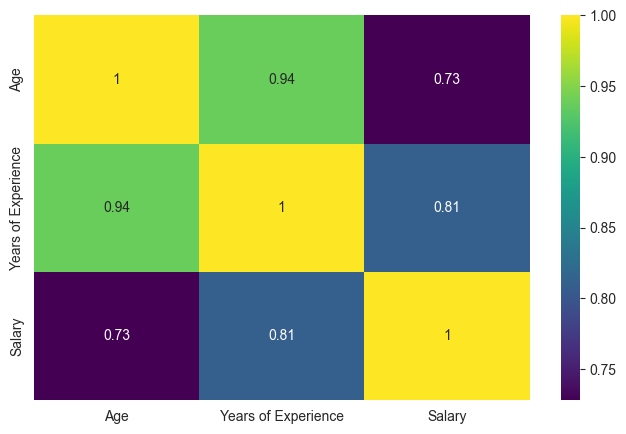

In [120]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')
plt.show()